In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_c = pd.read_csv('CSV/cleaned_terry_stops_v2.csv')

In [6]:
df_nc = pd.read_csv('CSV/nc_terry_stops_v2.csv')

In [536]:
df_nc = df_nc[df_nc.call_type != 'None']

In [200]:
list(df_c.columns)

['stop_resolution',
 'date',
 'off_age',
 'subj_age_group_1 - 17',
 'subj_age_group_18 - 25',
 'subj_age_group_26 - 35',
 'subj_age_group_36 - 45',
 'subj_age_group_46 - 55',
 'subj_age_group_56 and Above',
 'weapon_Blade',
 'weapon_Blunt Object',
 'weapon_Firearm',
 'weapon_Non-Lethal',
 'weapon_None',
 'off_gender_0',
 'off_gender_1',
 'off_race_American Indian/Alaska Native',
 'off_race_Asian',
 'off_race_Black or African American',
 'off_race_Hispanic or Latino',
 'off_race_Nat Hawaiian/Oth Pac Islander',
 'off_race_Two or More Races',
 'off_race_White',
 'subj_perceived_race_American Indian or Alaska Native',
 'subj_perceived_race_Asian',
 'subj_perceived_race_Black or African American',
 'subj_perceived_race_Hispanic',
 'subj_perceived_race_Multi-Racial',
 'subj_perceived_race_Native Hawaiian or Other Pacific Islander',
 'subj_perceived_race_White',
 'subj_perceived_gender_0',
 'subj_perceived_gender_1',
 'call_type_0',
 'call_type_1',
 'call_type_None',
 'frisk_flag_0',
 'frisk_

In [201]:
list(df_nc.columns)

['subj_age_group',
 'stop_resolution',
 'weapon',
 'off_gender',
 'off_race',
 'subj_perceived_race',
 'subj_perceived_gender',
 'call_type',
 'frisk_flag',
 'beat',
 'date',
 'off_age']

---

# Target Variable Distribution

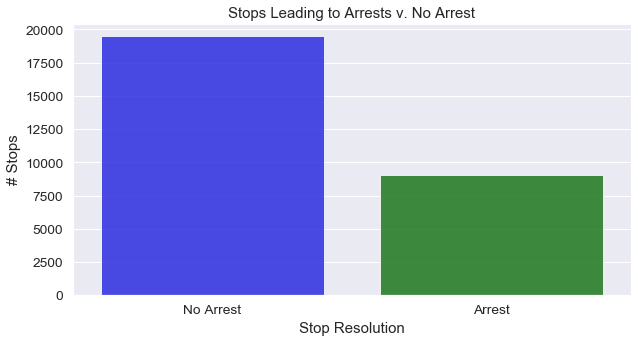

In [529]:
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df_nc.stop_resolution, alpha =.80, palette=['blue','green'])
plt.title('Stops Leading to Arrests v. No Arrest')
plt.xticks(ticks=[0,1], labels=['No Arrest', 'Arrest'])
plt.xlabel('Stop Resolution')
plt.ylabel('# Stops')
plt.show()

(array([19473.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9057.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

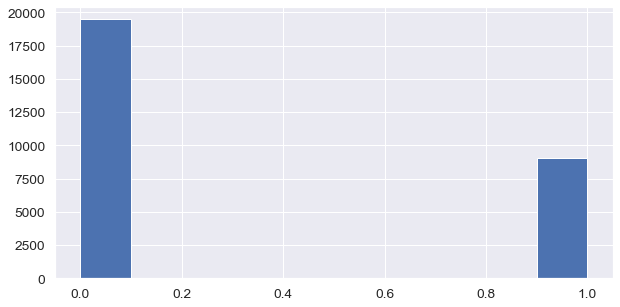

In [516]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.hist(df_nc['stop_resolution'])

---

## Correlation Matrix

In [410]:
corr = df_c.corr()

In [411]:
corr

,stop_resolution,date,off_age,subj_age_group_1 - 17,subj_age_group_18 - 25,subj_age_group_26 - 35,subj_age_group_36 - 45,subj_age_group_46 - 55,subj_age_group_56 and Above,weapon_Blade,...,beat_L,beat_M,beat_N,beat_O,beat_OOJ,beat_Q,beat_R,beat_S,beat_U,beat_W
stop_resolution,1.000000,0.028262,-0.072739,-0.026500,-0.007354,0.031106,0.007847,-0.021751,-0.009066,0.093189,...,-0.024367,0.057849,-0.025994,0.002920,-0.008748,0.002774,0.007425,0.009288,-0.036597,-0.032317
date,0.028262,1.000000,-0.114195,-0.069050,-0.085205,0.023726,0.052948,0.022638,0.040137,-0.000559,...,-0.059980,0.007380,-0.030766,0.025621,0.024445,0.041628,-0.029503,-0.016824,-0.039375,-0.006973
off_age,-0.072739,-0.114195,1.000000,-0.005983,-0.003522,0.009512,-0.006902,0.009484,-0.009940,0.013142,...,0.056154,-0.019793,0.061125,0.004360,-0.008960,-0.011056,-0.008816,-0.053625,0.042994,0.070162
subj_age_group_1 - 17,-0.026500,-0.069050,-0.005983,1.000000,-0.115987,-0.163221,-0.118278,-0.087731,-0.051769,-0.036015,...,0.038717,-0.034956,-0.006010,-0.035619,-0.004218,-0.014743,0.037953,0.062411,-0.016188,0.067863
subj_age_group_18 - 25,-0.007354,-0.085205,-0.003522,-0.115987,1.000000,-0.373025,-0.270313,-0.200501,-0.118312,-0.033800,...,0.001439,0.008713,-0.006602,-0.045065,-0.000439,-0.015278,0.015369,0.050882,0.057578,0.005630
subj_age_group_26 - 35,0.031106,0.023726,0.009512,-0.163221,-0.373025,1.000000,-0.380395,-0.282152,-0.166493,0.010395,...,0.006451,0.027306,0.033076,0.005499,0.006139,-0.003595,-0.033545,-0.029612,0.007384,-0.019403
subj_age_group_36 - 45,0.007847,0.052948,-0.006902,-0.118278,-0.270313,-0.380395,1.000000,-0.204462,-0.120649,0.026538,...,-0.010897,-0.011908,-0.005752,0.029204,-0.009831,0.005595,-0.006996,-0.035384,-0.030687,-0.009901
subj_age_group_46 - 55,-0.021751,0.022638,0.009484,-0.087731,-0.200501,-0.282152,-0.204462,1.000000,-0.089490,0.012204,...,-0.015201,-0.009031,-0.024135,0.028017,0.009320,0.015247,0.007679,-0.011919,-0.018136,-0.007155
subj_age_group_56 and Above,-0.009066,0.040137,-0.009940,-0.051769,-0.118312,-0.166493,-0.120649,-0.089490,1.000000,0.006826,...,-0.010658,-0.004902,-0.005548,0.008569,-0.004303,0.016622,0.008378,-0.006532,-0.021568,-0.005165
weapon_Blade,0.093189,-0.000559,0.013142,-0.036015,-0.033800,0.010395,0.026538,0.012204,0.006826,1.000000,...,-0.014047,0.012075,-0.007833,0.034437,0.004280,0.000977,-0.005720,-0.019829,0.003255,-0.014670


---

---

# Stops by Year and Arrests

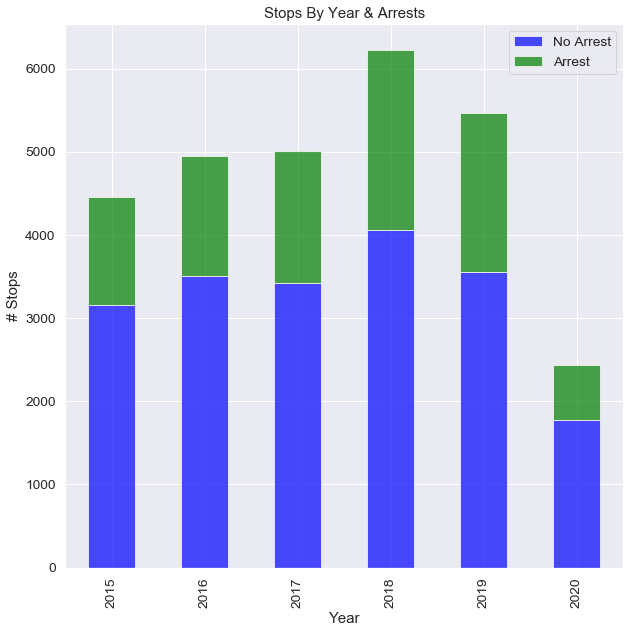

In [448]:
year = df_nc.groupby(['date','stop_resolution']).off_age.count().unstack()
p = year.plot(kind = 'bar', stacked = True, 
                   title = 'Stops By Year & Arrests', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
p.set_xlabel('Year')
p.set_ylabel('# Stops')
p.legend(['No Arrest','Arrest'])
plt.show()

---

# Beats

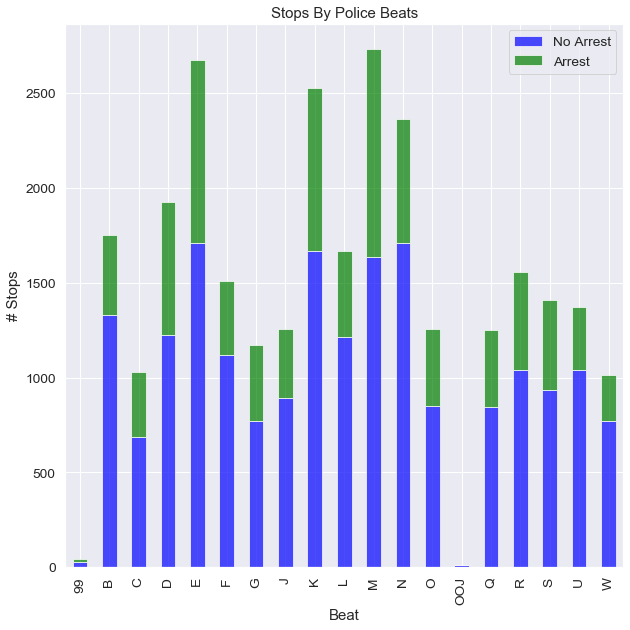

In [445]:
beats = df_nc.groupby(['beat','stop_resolution']).off_age.count().unstack()
b = beats.plot(kind = 'bar', stacked = True, 
                   title = 'Stops By Police Beats', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
b.set_xlabel('Beat')
b.set_ylabel('# Stops')
b.legend(['No Arrest','Arrest'])
plt.show()

---

### Stops by officer and and arrests

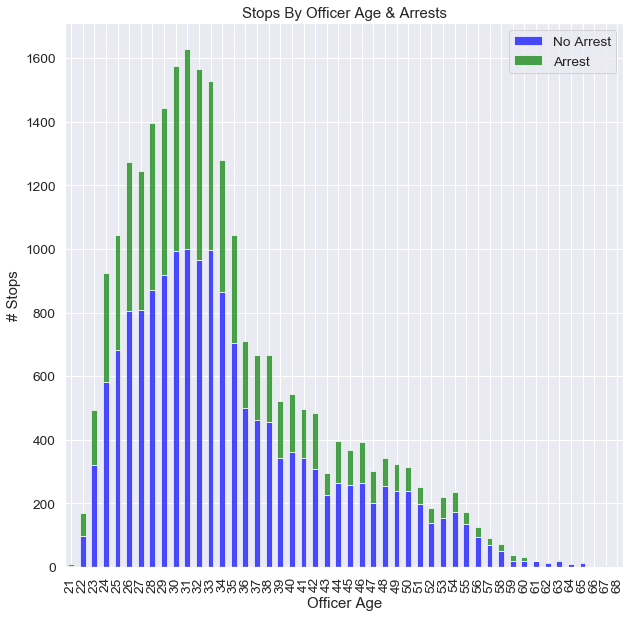

In [541]:
o_age = df_nc.groupby(['off_age','stop_resolution']).off_age.count().unstack()
p = o_age.plot(kind = 'bar', stacked = True, 
                   title = 'Stops By Officer Age & Arrests', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
p.set_xlabel('Officer Age')
p.set_ylabel('# Stops')
p.legend(['No Arrest','Arrest'])
plt.show()

---

## percentage of stops ending in arrest by officer race

In [202]:
# White officer arrest percentage
white_off_arrest = len(df_nc[(df_nc['off_race'] == 'White')&(df_nc['stop_resolution'] == 1)])
white_arrest_pct = white_off_arrest/len(df_nc[(df_nc['off_race'] == 'White')])
white_arrest_pct

0.32447533987416954

In [203]:
# Black officer arrest percentage
black_off_arrest = len(df_nc[(df_nc['off_race'] == 'Black or African American')&(df_nc['stop_resolution'] == 1)])
black_arrest_pct = black_off_arrest/len(df_nc[(df_nc['off_race'] == 'Black or African American')])
black_arrest_pct

0.2527881040892193

In [204]:
# Two or More Races officer arrest percentage
mixed_off_arrest = len(df_nc[(df_nc['off_race'] == 'Two or More Races')&(df_nc['stop_resolution'] == 1)])
mixed_arrest_pct = mixed_off_arrest/len(df_nc[(df_nc['off_race'] == 'Two or More Races')])
mixed_arrest_pct

0.29228775113415423

In [205]:
# Hispanic officer arrest percentage
hispanic_off_arrest = len(df_nc[(df_nc['off_race'] == 'Hispanic or Latino')&(df_nc['stop_resolution'] == 1)])
hispanic_arrest_pct = hispanic_off_arrest/len(df_nc[(non_cat_df['off_race'] == 'Hispanic or Latino')])
hispanic_arrest_pct

0.33639344262295084

In [207]:
# Asian officer arrest percentage
asian_off_arrest = len(df_nc[(df_nc['off_race'] == 'Asian')&(df_nc['stop_resolution'] == 1)])
asian_arrest_pct = asian_off_arrest/len(df_nc[(df_nc['off_race'] == 'Asian')])
asian_arrest_pct

0.2654639175257732

In [468]:
# Pacific Islander officer arrest percentage
pi_off_arrest = len(df_nc[(df_nc['off_race'] == 'Nat Hawaiian/Oth Pac Islander')&(df_nc['stop_resolution'] == 1)])
pi_arrest_pct = pi_off_arrest/len(df_nc[(df_nc['off_race'] == 'Nat Hawaiian/Oth Pac Islander')])
pi_arrest_pct

0.24555160142348753

In [469]:
# Native officer arrest percentage
native_off_arrest = len(df_nc[(df_nc['off_race'] == 'American Indian/Alaska Native')&(df_nc['stop_resolution'] == 1)])
native_arrest_pct = native_off_arrest/len(df_nc[(df_nc['off_race'] == 'American Indian/Alaska Native')])
native_arrest_pct

0.32075471698113206

In [465]:
df_nc.off_race.unique()

array(['White', 'Nat Hawaiian/Oth Pac Islander',
       'Black or African American', 'Asian',
       'American Indian/Alaska Native', 'Hispanic or Latino',
       'Two or More Races'], dtype=object)

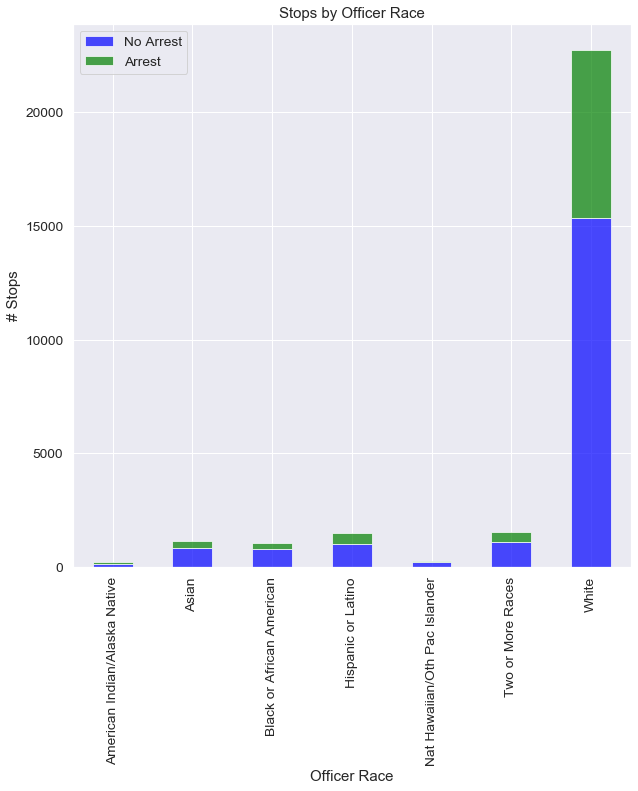

In [464]:
o_race = df_nc.groupby(['off_race','stop_resolution']).off_race.count().unstack()
o = o_race.plot(kind = 'bar', stacked = True, 
                   title = 'Stops by Officer Race', 
                   color = ['blue','green'], alpha = .70, figsize=(10,10))
o.set_xlabel('Officer Race')
o.set_ylabel('# Stops')
o.legend(['No Arrest','Arrest'])
plt.show()

---

### Percent of stops by race

In [208]:
df_nc['subj_perceived_race'].value_counts()

White                                        15202
Black or African American                     9620
Hispanic                                      1186
Asian                                          994
American Indian or Alaska Native               945
Multi-Racial                                   554
Native Hawaiian or Other Pacific Islander       29
Name: subj_perceived_race, dtype: int64

28,530 stops in total

Seattle Population White: 68%
Percentage Stops White: 53.3%

In [209]:
white_stops = len(df_nc[df_nc['subj_perceived_race']=='White'])/len(df_nc)
white_stops

0.5328426218016123

Seattle Population Black: 7%
Percentage Stops Black: 33.7%

Stopped at 4.81 times the population percentage

In [210]:
black_stops = len(df_nc[df_nc['subj_perceived_race']=='Black or African American'])/len(df_nc)
black_stops

0.33718892393971256

Seattle Population Hispanic: 6.6%
Percentage Stops Hispanic: 4.2%

In [211]:
hispanic_stops = len(df_nc[df_nc['subj_perceived_race']=='Hispanic'])/len(df_nc)
hispanic_stops

0.041570276901507185

Seattle Population Asian: 15%
Percentage Stops Asian: 3.5%

In [212]:
asian_stops = len(df_nc[df_nc['subj_perceived_race']=='Asian'])/len(df_nc)
asian_stops

0.03484051875219068

Seattle Population American Indian or Alaska Native: 0.6%
Percentage Stops American Indian or Alaska Native: 3.3%

Stopped at 5.5 times the population percentage

In [213]:
native_stops = len(df_nc[df_nc['subj_perceived_race']=='American Indian or Alaska Native'])/len(df_nc)
native_stops

0.033123028391167195

Seattle Population Mixed: 6.8%
Percentage Stops Mixed: 1.9%

In [214]:
mixed_stops = len(df_nc[df_nc['subj_perceived_race']=='Multi-Racial'])/len(df_nc)
mixed_stops

0.019418156326673677

Seattle Population Hawaiian/Pacific Islander: 0.3%
Percentage Stops Mixed: 0.001%

In [215]:
pi_stops = len(df_nc[df_nc['subj_perceived_race']=='Native Hawaiian or Other Pacific Islander'])/len(df_nc)
pi_stops

0.0010164738871363476

In [257]:
df_nc.subj_perceived_race.unique()

array(['White', 'Black or African American',
       'American Indian or Alaska Native', 'Hispanic', 'Multi-Racial',
       'Asian', 'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [387]:
# Percent of stops by race
race_stops = [white_stops, black_stops, native_stops, hispanic_stops, mixed_stops, asian_stops, pi_stops]

In [402]:
race_pct_pop = [.68, .07, .006, .066, .068, .15, .003]

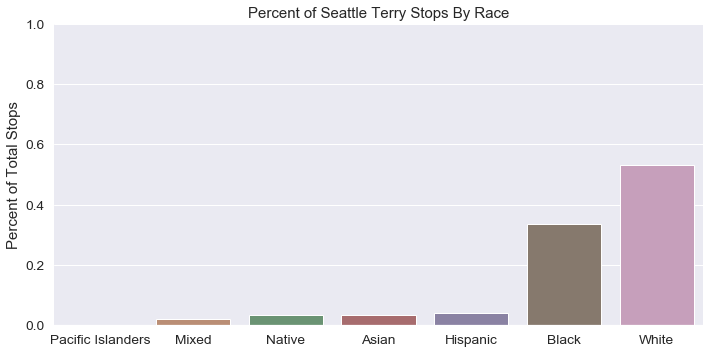

In [407]:
g = sns.catplot(x=race_stops, y=race_stops,
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g.axes.flatten()
axes[0].set_title("Percent of Seattle Terry Stops By Race")

(g.set_axis_labels("", "Percent of Total Stops")
  .set_xticklabels(["Pacific Islanders", "Mixed", "Native", "Asian", "Hispanic", "Black", "White"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.show()

---

### Seattle's Population by Race

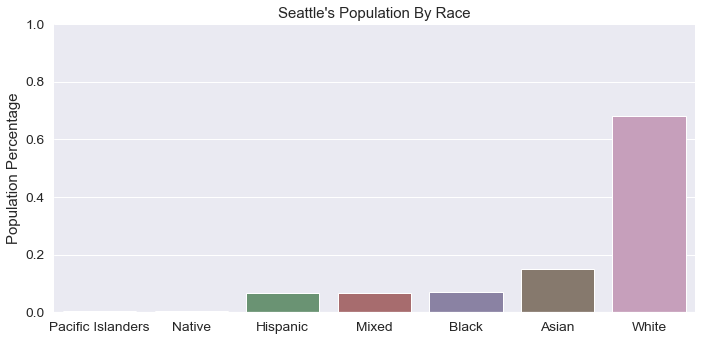

In [408]:
g_2 = sns.catplot(x=race_pct_pop, y=race_pct_pop,
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g_2.axes.flatten()
axes[0].set_title("Seattle's Population By Race")

(g_2.set_axis_labels("", "Population Percentage")
  .set_xticklabels(["Pacific Islanders", "Native", "Hispanic", "Mixed", "Black", "Asian", "White"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.show()

---

### Stops leading to arrest by subject race

In [367]:
df_nc[(df_nc['subj_perceived_race']=='White')&(df_nc['stop_resolution']==1)]

,subj_age_group,stop_resolution,weapon,off_gender,off_race,subj_perceived_race,subj_perceived_gender,call_type,frisk_flag,beat,date,off_age
1,46 - 55,1,None,0,White,White,0,None,0,L,2018,26
29,1 - 17,1,None,0,White,White,0,0,1,L,2015,30
61,1 - 17,1,None,0,White,White,0,1,0,R,2015,40
78,1 - 17,1,None,0,Asian,White,0,0,0,B,2015,30
79,1 - 17,1,Firearm,0,White,White,0,0,1,L,2015,30
...,...,...,...,...,...,...,...,...,...,...,...,...
28510,56 and Above,1,Blade,0,Two or More Races,White,0,0,1,M,2020,31
28511,56 and Above,1,None,0,White,White,1,0,1,D,2020,35
28517,56 and Above,1,None,0,White,White,0,None,0,R,2019,26
28523,56 and Above,1,None,0,White,White,0,1,0,R,2020,29


In [377]:
df_nc[(df_nc['subj_perceived_race']=='White')&(df_nc['stop_resolution']==1)]

,subj_age_group,stop_resolution,weapon,off_gender,off_race,subj_perceived_race,subj_perceived_gender,call_type,frisk_flag,beat,date,off_age
1,46 - 55,1,None,0,White,White,0,None,0,L,2018,26
29,1 - 17,1,None,0,White,White,0,0,1,L,2015,30
61,1 - 17,1,None,0,White,White,0,1,0,R,2015,40
78,1 - 17,1,None,0,Asian,White,0,0,0,B,2015,30
79,1 - 17,1,Firearm,0,White,White,0,0,1,L,2015,30
...,...,...,...,...,...,...,...,...,...,...,...,...
28510,56 and Above,1,Blade,0,Two or More Races,White,0,0,1,M,2020,31
28511,56 and Above,1,None,0,White,White,1,0,1,D,2020,35
28517,56 and Above,1,None,0,White,White,0,None,0,R,2019,26
28523,56 and Above,1,None,0,White,White,0,1,0,R,2020,29


In [376]:
white_subj_arrest = len(df_nc[(df_nc['subj_perceived_race']=='White')&(df_nc['stop_resolution']==1)])/len(df_nc)
white_subj_arrest

0.16235541535226078

Stops ending/not ending in arrest by race

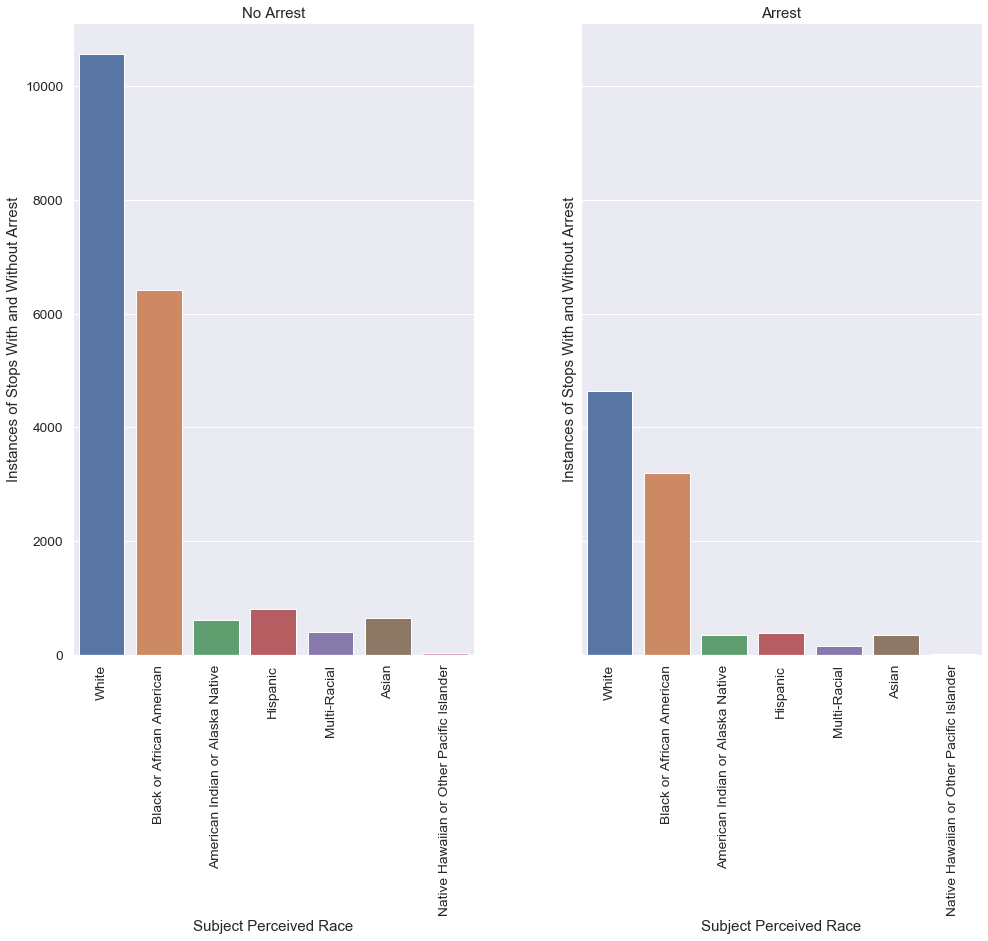

In [287]:
h = sns.catplot(x="subj_perceived_race", col="stop_resolution",
                data=df_nc, kind="count", legend=True,
                height=10, aspect=.75);
axes = h.axes.flatten()
axes[0].set_title("No Arrest")
axes[1].set_title("Arrest")
h.set(ylabel='Instances of Stops With and Without Arrest')
h.set(xlabel='Subject Perceived Race')
sns.set(font_scale=1.25)
h.set_xticklabels(rotation=90)
plt.show()

Percent stops ending in arrest by race

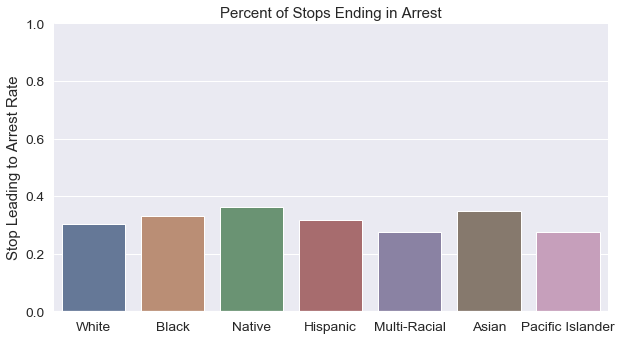

In [366]:
g = sns.catplot(x="subj_perceived_race", y="stop_resolution",
                data=df_nc, saturation=.5,
                kind="bar", ci=None, aspect=2)

axes = g.axes.flatten()
axes[0].set_title("Percent of Stops Ending in Arrest")

(g.set_axis_labels("", "Stop Leading to Arrest Rate")
  .set_xticklabels(["White", "Black", "Native", "Hispanic", "Multi-Racial", "Asian", "Pacific Islander"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

---

# Weapons found in stops

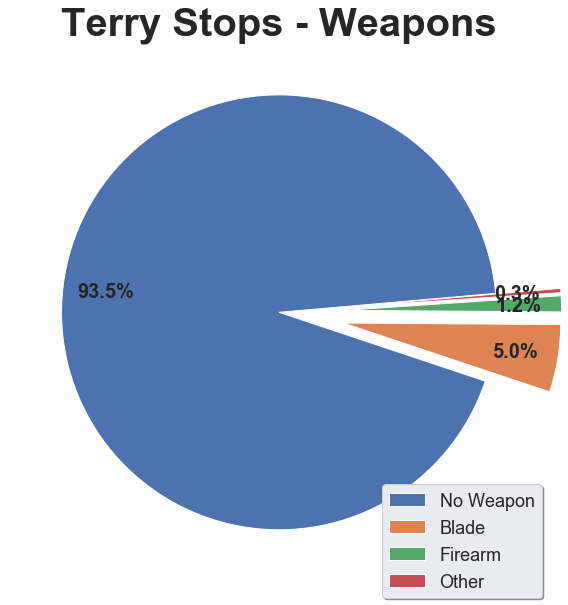

In [379]:
sizes = [26671, 1430, 339, 90]
explode = (0, 0.3, 0.3, 0.3)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, 
        explode=explode,
        autopct='%1.1f%%', 
        shadow=False, 
        startangle=5,
        labeldistance=1,
        pctdistance=.8,
        textprops={'fontsize': 20, 'weight':'bold'})
ax1.set_title('Terry Stops - Weapons', size=40, weight="bold")
ax1.legend(labels=['No Weapon', 'Blade', 'Firearm', 'Other'], 
           bbox_to_anchor=(.1, .1, .9, .1),
           shadow=True,
           fontsize='large')

plt.show()

---